<a href="https://colab.research.google.com/github/soham283/Codersweek-ML/blob/master/MLday2task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#1 Importing the librariesimport numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


#2 Importing the dataset

dataset = pd.read_csv('http://iali.in/datasets/Social_Network_Ads.csv ')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

#3 Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
#4 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#It does not need to scale y_train because it contains categorical 
#data 
"""sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'sc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [0]:
#Import the LogisticRegression class from the sklearn.linear_model
#library
from sklearn.linear_model import LogisticRegression
#There are many optional parameters. Lets only use random_state=0
#We create a classifier object of LR class
classifier= LogisticRegression(random_state=0)
#Fit logistic regression model to the training set (X_train and #y_train)
classifier.fit(X_train, y_train)
#6 Predicting the Test set results
#Using predict method for the classifier object and put X_test for #argument
y_pred = classifier.predict(X_test)

In [0]:
#7 Making the Confusion Matrix. It contains the correct and
#incorrect predictions of our model 
#import confusion_matrix function from sklearn.metrics library
from sklearn.metrics import confusion_matrix
#y_true parameter will be y_test
#y_pred is the logistic regression model prediction
cm=confusion_matrix(y_test, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


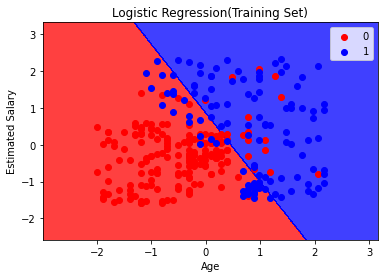

In [13]:
#8 Visualizing the Training Set results: 
#ListedColormap class help us to colorize the data points.
from matplotlib.colors import ListedColormap
#Create local variables X_set and y_set. Because we use these
#variables again in the test set
X_set, y_set= X_train, y_train
#Create the grid. step=0.01 means all the pixels were actually with
#a 0.01 resolution. min and max of the 
#X_Set use with minus ana plus one to prevent ponits to be squeezed 
#on the axes.
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))
#This is the line applying the classifier on all the pixel
#observation points. It colors all the red pixel 
#points and the blue pixel points. contour function make the contour 
#between red and blue regions.
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('red','blue')))
#plot the limits of the age and the estimated salary lines.
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
#This loop here plots all the data points that are the real values.
 
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)

#Add the name of the plot and the labels.
plt.title('Logistic Regression(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


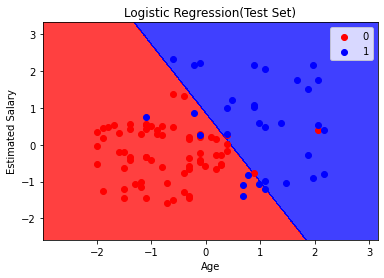

In [14]:
#9 Visualizing the Test Set results:from matplotlib.colors import ListedColormap
X_set, y_set= X_test, y_test
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('red','blue')))
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j) 
plt.title('Logistic Regression(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()